# Cellpose

This notebooks shows an advanced usage of Python and notebooks with the segmentation package cellpose.

First, open a terminal, create a new environment, install cellpose and launch jupyterlab:

```
conda create -n cellpose_zidas python=3.12 jupyterlab scikit-image napari pyqt matplotlib
conda activate cellpose_zidas
pip install cellpose
jupyter lab
```

Then import cellpose as a package (as well as other packages):

In [1]:
# On Macs you might have to bypass an error with
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import skimage
from cellpose import models
import numpy as np
import napari



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.6 
platform:       	darwin 
python version: 	3.12.11 
torch version:  	2.7.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




Now we load an image. This image comes from the [Cell Atlas](https://www.proteinatlas.org/humanproteome/cell). For more information see the publication of Thul PJ et al., A subcellular map of the human proteome. **Science**. (2017) DOI: [10.1126/science.aal3321](https://doi.org/10.1126/science.aal3321). All images are covered by a [Creative Commons Attribution-ShareAlike 3.0 International License](https://creativecommons.org/licenses/by-sa/3.0/).

In [3]:
image = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/refs/heads/master/images/19838_1252_F8_1.tif')

In [4]:
image.shape

(2048, 2048, 3)

If you have a GPU or are using an M-series Mac (M1, M2 etc.) you can use the ```gpu=True``` option. Note that with the recent Cellpose-SAM, running on CPU will be slow (and consume a lot of CPU) but it will run.

In [23]:
mymodel = models.CellposeModel(gpu=True)

In [21]:
pred, _, _, = mymodel.eval(image, channel_axis=2, diameter=400)

Resizing is depricated in v4.0.1+


In [22]:
viewer = napari.Viewer()
viewer.add_image(image, channel_axis=2)
viewer.add_labels(pred);

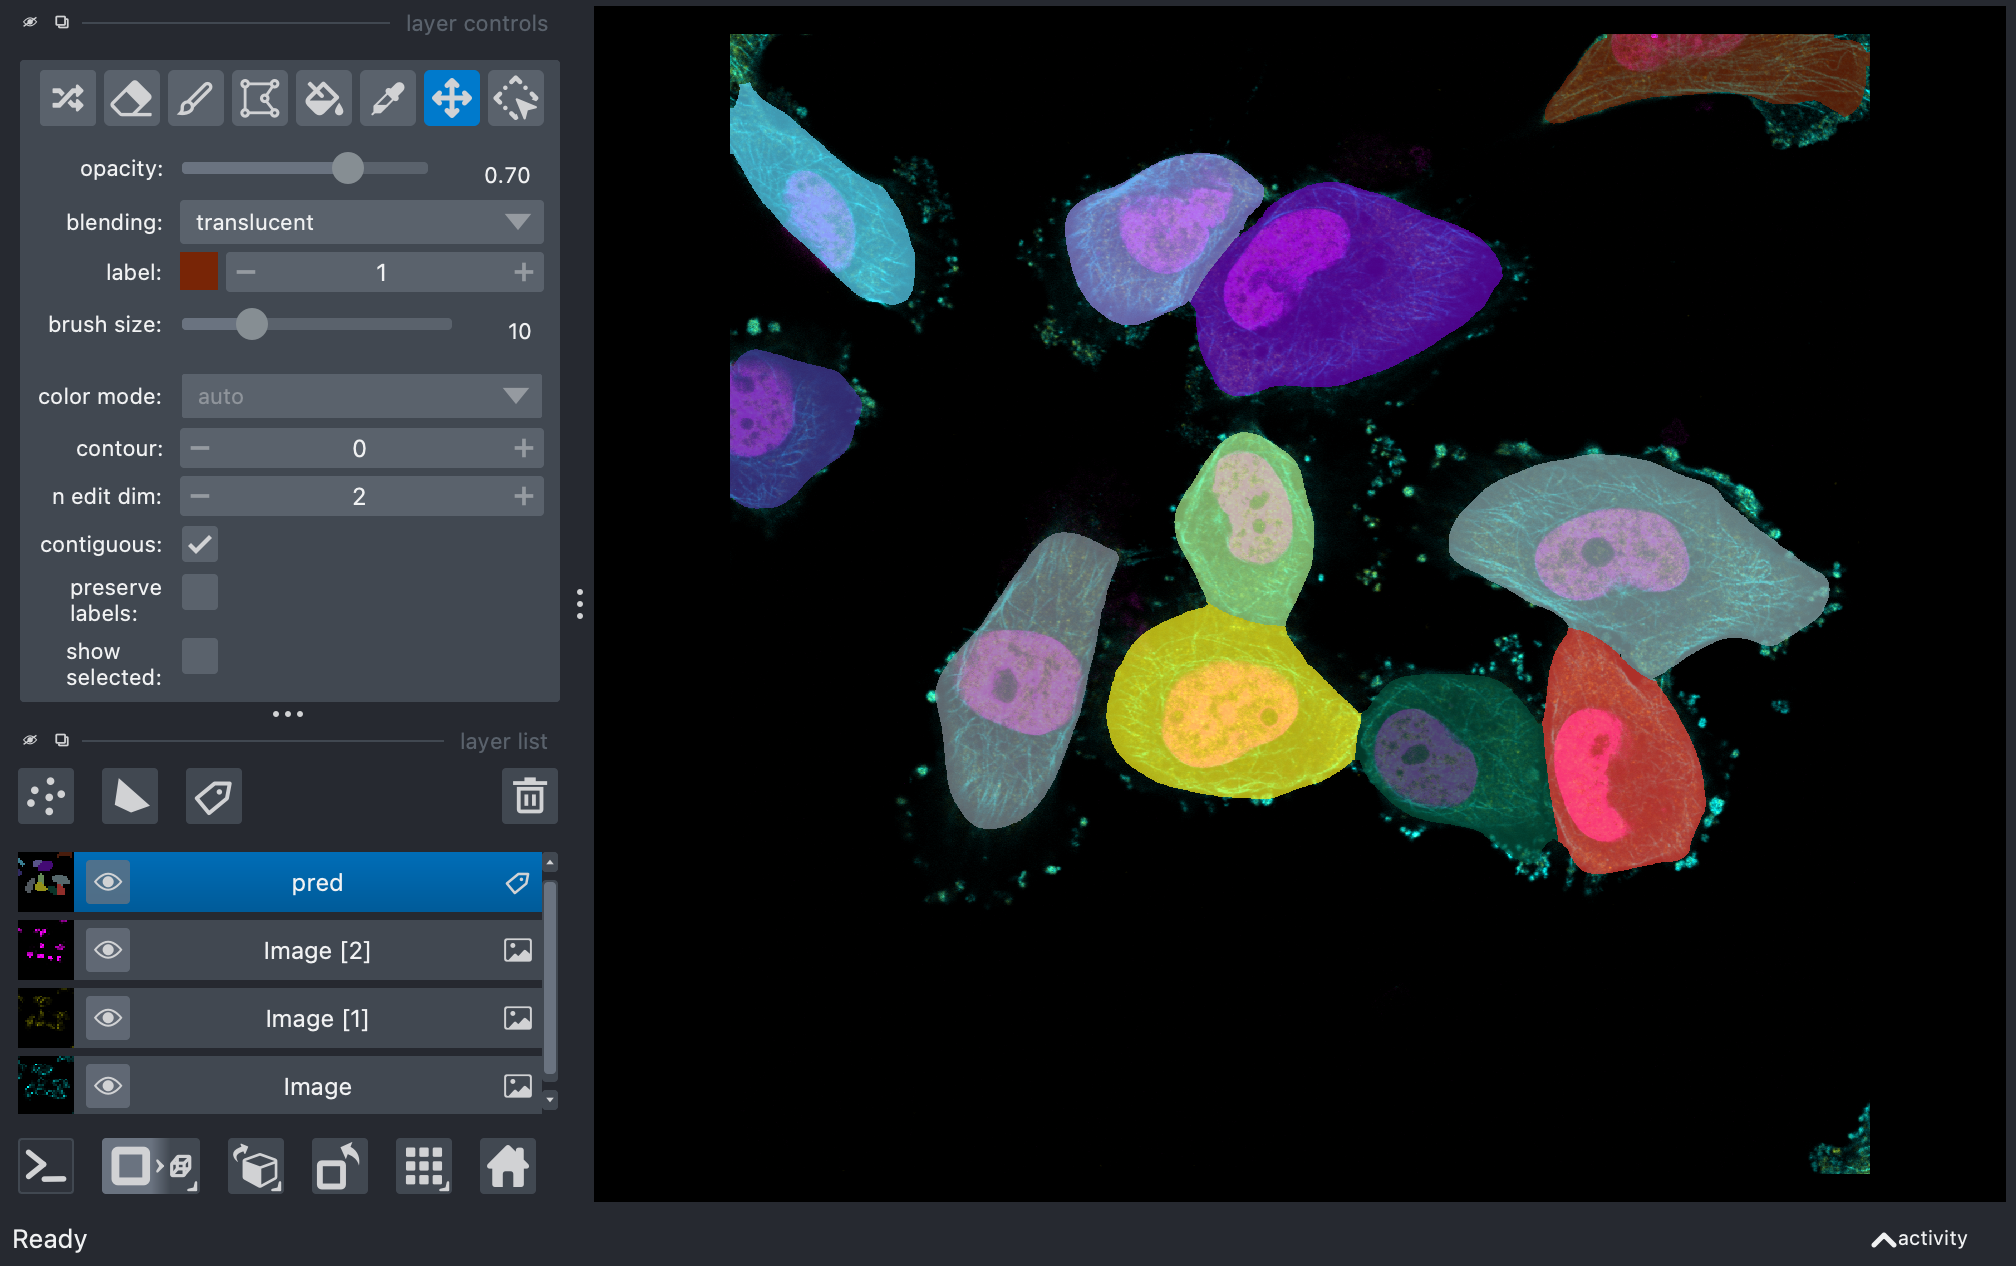

In [19]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)